## Setup the Notebook

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
print("Setup Complete")

Setup Complete


## Load the Data

In [2]:
# Read the file into a variable qb_data
qb_data = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_QB_2019.csv')

## Examine the Data

In [3]:
# Print the first 5 rows of the data
qb_data.head()

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Lamar Jackson (BAL),265.0,401.0,66.1,"3,127",7.8,36.0,6.0,23.0,176.0,"1,206",7.0,2.0,15.0,421.7,28.1,96.7%
1,2.0,Dak Prescott (DAL),388.0,596.0,65.1,"4,902",8.2,30.0,11.0,23.0,52.0,277,3.0,2.0,16.0,348.9,21.8,96.4%
2,3.0,Jameis Winston (TB),380.0,626.0,60.7,"5,109",8.2,33.0,30.0,47.0,59.0,250,1.0,5.0,16.0,335.2,21.0,89.1%
3,4.0,Russell Wilson (SEA),341.0,516.0,66.1,"4,110",8.0,31.0,5.0,48.0,75.0,342,3.0,2.0,16.0,333.5,20.8,99.3%
4,5.0,Deshaun Watson (HOU),333.0,495.0,67.3,"3,852",7.8,26.0,12.0,44.0,82.0,413,7.0,3.0,15.0,332.0,22.1,99.3%


I've checked this against the first 5 rows displayed by the source, some columns need to be renamed.

### Rename variables

In [4]:
new_names = {'CMP':'Pass_Comp',
             'ATT':'Pass_Att',
             'YDS':'Pass_Yds',
             'TD':'Pass_TD',
             'INT':'Pass_Int',
             'SACKS':'Pass_Sacks',
             'ATT.1':'Rush_Att',
             'YDS.1':'Rush_Yds',
             'TD.1':'Rush_TD',
             'FL':'Fumbles',
             'G':'Games'}
qb_data.rename(columns=new_names, inplace=True)
qb_data.columns

Index(['Rank', 'Player', 'Pass_Comp', 'Pass_Att', 'PCT', 'Pass_Yds', 'Y/A',
       'Pass_TD', 'Pass_Int', 'Pass_Sacks', 'Rush_Att', 'Rush_Yds', 'Rush_TD',
       'Fumbles', 'Games', 'FPTS', 'FPTS/G', 'OWN'],
      dtype='object')

In [5]:
qb_data.shape

(145, 18)

In [6]:
qb_data.nunique(axis=0)

Rank          143
Player        143
Pass_Comp      60
Pass_Att       63
PCT            52
Pass_Yds       67
Y/A            42
Pass_TD        26
Pass_Int       19
Pass_Sacks     33
Rush_Att       39
Rush_Yds       56
Rush_TD         7
Fumbles         8
Games          17
FPTS           69
FPTS/G         57
OWN            53
dtype: int64

In [7]:
qb_data.dtypes

Rank          float64
Player         object
Pass_Comp     float64
Pass_Att      float64
PCT           float64
Pass_Yds       object
Y/A           float64
Pass_TD       float64
Pass_Int      float64
Pass_Sacks    float64
Rush_Att      float64
Rush_Yds       object
Rush_TD       float64
Fumbles       float64
Games         float64
FPTS          float64
FPTS/G        float64
OWN            object
dtype: object

In [8]:
qb_data.describe()

,Rank,Pass_Comp,Pass_Att,PCT,Y/A,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_TD,Fumbles,Games,FPTS,FPTS/G
count,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,72.00000,79.034965,124.517483,29.390909,3.058042,5.531469,2.832168,8.888112,12.762238,0.559441,0.923077,4.517483,63.255944,5.318881
std,41.42463,129.298890,201.935698,31.482025,3.428103,9.661747,5.067135,14.251318,24.917034,1.427212,1.807952,5.812630,107.700047,7.546167
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.800000,-0.200000
25%,36.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,107.50000,97.500000,160.000000,61.900000,6.600000,6.000000,4.000000,14.500000,15.000000,0.000000,1.000000,8.000000,77.150000,11.350000
max,143.00000,408.000000,626.000000,100.000000,9.600000,36.000000,30.000000,48.000000,176.000000,9.000000,11.000000,16.000000,421.700000,28.100000


1. Pass_Yds and Rush_Yds are missing. This is likely due to a comma in the field making it a string instead of a number.
2. Minimum, 25%, and 50% are 1 or lower for all columns. This may indicate an abundace of rows with low values or values that equal 0. These rows may need to be removed for a more accurate picture.

In [9]:
# Remove the commas from Pass_Yds and Rush_Yds
qb_data['Pass_Yds'] = qb_data['Pass_Yds'].str.replace(',','')
qb_data['Pass_Yds'] = qb_data['Pass_Yds'].astype(float)
qb_data['Rush_Yds'] = qb_data['Rush_Yds'].str.replace(',','')
qb_data['Rush_Yds'] = qb_data['Rush_Yds'].astype(float)
qb_data.dtypes

Rank          float64
Player         object
Pass_Comp     float64
Pass_Att      float64
PCT           float64
Pass_Yds      float64
Y/A           float64
Pass_TD       float64
Pass_Int      float64
Pass_Sacks    float64
Rush_Att      float64
Rush_Yds      float64
Rush_TD       float64
Fumbles       float64
Games         float64
FPTS          float64
FPTS/G        float64
OWN            object
dtype: object

In [10]:
qb_data.describe()

,Rank,Pass_Comp,Pass_Att,PCT,Pass_Yds,Y/A,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_Yds,Rush_TD,Fumbles,Games,FPTS,FPTS/G
count,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,72.00000,79.034965,124.517483,29.390909,898.328671,3.058042,5.531469,2.832168,8.888112,12.762238,53.832168,0.559441,0.923077,4.517483,63.255944,5.318881
std,41.42463,129.298890,201.935698,31.482025,1491.349204,3.428103,9.661747,5.067135,14.251318,24.917034,138.689337,1.427212,1.807952,5.812630,107.700047,7.546167
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,-0.800000,-0.200000
25%,36.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,107.50000,97.500000,160.000000,61.900000,1052.500000,6.600000,6.000000,4.000000,14.500000,15.000000,39.500000,0.000000,1.000000,8.000000,77.150000,11.350000
max,143.00000,408.000000,626.000000,100.000000,5109.000000,9.600000,36.000000,30.000000,48.000000,176.000000,1206.000000,9.000000,11.000000,16.000000,421.700000,28.100000


## Clean the data

### Remove redundant or unnecessary variables

In [46]:
qb_cleaned = qb_data.copy().drop(['PCT', 'Y/A', 'FPTS/G','OWN'], axis=1)
qb_cleaned.columns

Index(['Rank', 'Player', 'Pass_Comp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Pass_Sacks', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Fumbles',
       'Games', 'FPTS'],
      dtype='object')

### Variable Selection

In [47]:
qb_cleaned.isnull().sum()

Rank          2
Player        2
Pass_Comp     2
Pass_Att      2
Pass_Yds      2
Pass_TD       2
Pass_Int      2
Pass_Sacks    2
Rush_Att      2
Rush_Yds      2
Rush_TD       2
Fumbles       2
Games         2
FPTS          2
dtype: int64

In [48]:
qb_cleaned[qb_cleaned.Rank.isnull()]

,Rank,Player,Pass_Comp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_Yds,Rush_TD,Fumbles,Games,FPTS
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
qb_cleaned = qb_cleaned.copy().drop([143,144], axis=0)
qb_cleaned.isnull().sum()

Rank          0
Player        0
Pass_Comp     0
Pass_Att      0
Pass_Yds      0
Pass_TD       0
Pass_Int      0
Pass_Sacks    0
Rush_Att      0
Rush_Yds      0
Rush_TD       0
Fumbles       0
Games         0
FPTS          0
dtype: int64

In [50]:
# Drop Duplicates
qb_cleaned.shape

(143, 14)

In [51]:
qb_cleaned.drop_duplicates(keep='first').shape

(143, 14)

### Revisiting issue found during describe()

In [52]:
qb_cleaned[qb_cleaned['Pass_Comp'] == 0].shape[0]

75

More than half of the rows in the data have a 0 in the CMP column.

In [53]:
# If a player has a 0 in every column (they didn't play), we don't want that data skewing the other data. 
qb_cleaned[(qb_cleaned['Pass_Comp'] == 0) & 
           (qb_cleaned['Pass_Att'] == 0) &
           (qb_cleaned['Pass_Yds'] == 0) &
           (qb_cleaned['Pass_TD'] == 0) &
           (qb_cleaned['Pass_Int'] == 0) &
           (qb_cleaned['Pass_Sacks'] == 0) &
           (qb_cleaned['Rush_Att'] == 0) &
           (qb_cleaned['Rush_Yds'] == 0) &
           (qb_cleaned['Rush_TD'] == 0) &
           (qb_cleaned['Fumbles'] == 0) &
           (qb_cleaned['Games'] == 0)].shape

(54, 14)

In [54]:
columns = ['Pass_Comp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Pass_Sacks', 
           'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Fumbles','Games']
qb_cleaned = qb_cleaned.replace(0, pd.np.nan).dropna(axis=0, how='all', subset=columns).fillna(0)
qb_cleaned.sample(10)

,Rank,Player,Pass_Comp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_Yds,Rush_TD,Fumbles,Games,FPTS
142,143.0,Blake Bortles (LAR),1.0,2.0,3.0,0.0,0.0,0.0,2.0,-9.0,0.0,0.0,4.0,-0.8
18,19.0,Baker Mayfield (CLE),317.0,534.0,3827.0,22.0,21.0,40.0,28.0,141.0,3.0,2.0,16.0,250.3
53,54.0,Luke Falk (FA),47.0,73.0,416.0,0.0,3.0,16.0,0.0,0.0,0.0,1.0,3.0,11.6
36,37.0,Drew Lock (DEN),100.0,156.0,1020.0,7.0,3.0,5.0,18.0,72.0,0.0,1.0,5.0,71.1
60,61.0,Josh McCown (PHI),3.0,5.0,24.0,0.0,0.0,0.0,2.0,-2.0,0.0,0.0,3.0,0.8
56,57.0,Tyrod Taylor (LAC),4.0,6.0,33.0,1.0,0.0,0.0,10.0,7.0,0.0,0.0,8.0,6.0
10,11.0,Matt Ryan (ATL),408.0,616.0,4466.0,26.0,14.0,48.0,34.0,147.0,1.0,5.0,15.0,281.4
61,62.0,Ryan Griffin (TB),2.0,4.0,18.0,0.0,0.0,0.0,4.0,-1.0,0.0,0.0,2.0,0.6
26,27.0,Sam Darnold (NYJ),273.0,441.0,3024.0,19.0,13.0,33.0,33.0,62.0,2.0,3.0,13.0,202.1
19,20.0,Gardner Minshew II (JAC),285.0,470.0,3271.0,21.0,6.0,33.0,67.0,344.0,0.0,7.0,14.0,235.3


In [55]:
qb_cleaned.shape[0]

89

In 'Player' there is text behind the player's name to indicate what team he plays for. This is the current team, for example Philip Rivers was released from the Chargers at the end of the 2019 season. It would make sense that the letters behind his name should read '(SD)' instead of '(FA)'. Since this analysis is of the player, we will remove the team name from the 'Player' variable. 

In [61]:
qb_cleaned['Player'] = qb_cleaned['Player'].str.replace(pat=r'\(.*\)', repl='')
qb_cleaned.sample(5)

,Player,Pass_Comp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_Yds,Rush_TD,Fumbles,Games,FPTS
102,Hunter Cantwell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,Brett Ratliff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Gardner Minshew II,285.0,470.0,3271.0,21.0,6.0,33.0,67.0,344.0,0.0,7.0,14.0,235.3
24,Andy Dalton,314.0,528.0,3494.0,16.0,14.0,37.0,32.0,73.0,4.0,4.0,13.0,216.5
140,Garrett Gilbert,0.0,3.0,0.0,0.0,0.0,0.0,3.0,-3.0,0.0,0.0,6.0,-0.3


In [57]:
qb_cleaned.describe()

,Rank,Pass_Comp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_Yds,Rush_TD,Fumbles,Games,FPTS
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,54.000000,126.988764,200.067416,1443.382022,8.887640,4.550562,14.280899,20.505618,86.494382,0.898876,1.483146,7.258427,101.635955
std,40.910101,144.285504,224.753339,1671.306270,10.975632,5.789904,15.806349,29.004358,167.870968,1.725774,2.105795,5.865012,121.539854
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,-0.800000
25%,23.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,45.000000,50.000000,87.000000,567.000000,3.000000,2.000000,7.000000,8.000000,20.000000,0.000000,0.000000,5.000000,33.900000
75%,69.000000,281.000000,447.000000,3089.000000,20.000000,6.000000,27.000000,31.000000,101.000000,1.000000,2.000000,14.000000,226.900000
max,143.000000,408.000000,626.000000,5109.000000,36.000000,30.000000,48.000000,176.000000,1206.000000,9.000000,11.000000,16.000000,421.700000


In [58]:
# Remove columns
qb_cleaned = qb_data.copy().drop(['Rank','PCT','Y/A','FPTS/G','OWN'], axis=1)
qb_cleaned.columns

Index(['Player', 'Pass_Comp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int',
       'Pass_Sacks', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Fumbles', 'Games',
       'FPTS'],
      dtype='object')

## Correlation Matrix

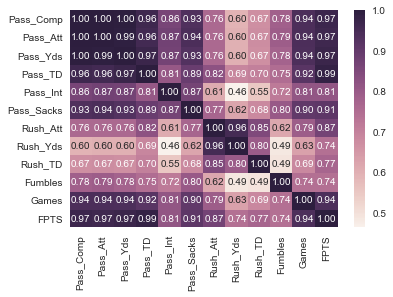

In [59]:
sns.heatmap(qb_cleaned.corr(),annot=True, fmt=".2f")

#### 1. Which are the Top 5 Quarterbacks last year in Fantasy Points?

In [62]:
top_fantasy_qbs = qb_cleaned.sort_values(by = 'FPTS', ascending=False).head()
top_fantasy_qbs

,Player,Pass_Comp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_Yds,Rush_TD,Fumbles,Games,FPTS
0,Lamar Jackson,265.0,401.0,3127.0,36.0,6.0,23.0,176.0,1206.0,7.0,2.0,15.0,421.7
1,Dak Prescott,388.0,596.0,4902.0,30.0,11.0,23.0,52.0,277.0,3.0,2.0,16.0,348.9
2,Jameis Winston,380.0,626.0,5109.0,33.0,30.0,47.0,59.0,250.0,1.0,5.0,16.0,335.2
3,Russell Wilson,341.0,516.0,4110.0,31.0,5.0,48.0,75.0,342.0,3.0,2.0,16.0,333.5
4,Deshaun Watson,333.0,495.0,3852.0,26.0,12.0,44.0,82.0,413.0,7.0,3.0,15.0,332.0


#### 2. What are the Top and Bottom Quarterbacks for Fantasy Points?

In [63]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5 and bottom 5 players dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 players dataframe
    """
    
    top = qb_cleaned[col].idxmax()
    top_df = pd.DataFrame(qb_cleaned.loc[top])
    
    bottom = qb_cleaned[col].idxmin()
    bottom_df = pd.DataFrame(qb_cleaned.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('FPTS')

,0,142
Player,Lamar Jackson,Blake Bortles
Pass_Comp,265,1
Pass_Att,401,2
Pass_Yds,3127,3
Pass_TD,36,0
Pass_Int,6,0
Pass_Sacks,23,0
Rush_Att,176,2
Rush_Yds,1206,-9
Rush_TD,7,0


In [64]:
find_min_max_in('Rush_TD')

,5,14
Player,Josh Allen,Philip Rivers
Pass_Comp,271,390
Pass_Att,461,591
Pass_Yds,3089,4615
Pass_TD,20,23
Pass_Int,9,20
Pass_Sacks,38,34
Rush_Att,109,12
Rush_Yds,510,29
Rush_TD,9,0


In [65]:
find_min_max_in('Pass_TD')

,0,35
Player,Lamar Jackson,Taysom Hill
Pass_Comp,265,3
Pass_Att,401,6
Pass_Yds,3127,55
Pass_TD,36,0
Pass_Int,6,0
Pass_Sacks,23,1
Rush_Att,176,27
Rush_Yds,1206,156
Rush_TD,7,1


#### 3. Top 5 Quarterbacks in Pass Yards per Pass Attempt?

In [66]:
# To find the most pass yards per pass attempt, we'll divide Pass_Yds by Pass_Att
qb_cleaned['Pass_Yds/Att'] = qb_cleaned['Pass_Yds'] / qb_cleaned['Pass_Att']
qb_cleaned.sort_values(by = ['Pass_Yds/Att'], ascending=False).head()

,Player,Pass_Comp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_Yds,Rush_TD,Fumbles,Games,FPTS,Pass_Yds/Att
20,Ryan Tannehill,201.0,286.0,2742.0,22.0,6.0,31.0,43.0,185.0,4.0,3.0,12.0,230.2,9.587413
35,Taysom Hill,3.0,6.0,55.0,0.0,0.0,1.0,27.0,156.0,1.0,0.0,16.0,83.2,9.166667
44,Matt Schaub,50.0,67.0,580.0,3.0,1.0,2.0,3.0,-3.0,0.0,1.0,7.0,33.9,8.656716
28,Matthew Stafford,187.0,291.0,2499.0,19.0,5.0,18.0,20.0,66.0,0.0,3.0,8.0,171.5,8.587629
13,Jimmy Garoppolo,329.0,476.0,3978.0,27.0,13.0,36.0,46.0,62.0,1.0,5.0,16.0,260.2,8.357143


#### 4. Top 5 Quarterbacks in Fantasy Points per touch (Pass Attempts + Rush Attempts)?

In [67]:
# To find the most pass yards per touch, we'll divide FPTS by the sum of Pass_Att and Rush_Att.
qb_cleaned['FPTS_per_touch'] = qb_cleaned['FPTS'] / (qb_cleaned['Pass_Att'] + qb_cleaned['Rush_Att'])
qb_cleaned.sort_values(by = ['FPTS_per_touch'], ascending=False).head()

,Player,Pass_Comp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_Yds,Rush_TD,Fumbles,Games,FPTS,Pass_Yds/Att,FPTS_per_touch
35,Taysom Hill,3.0,6.0,55.0,0.0,0.0,1.0,27.0,156.0,1.0,0.0,16.0,83.2,9.166667,2.521212
0,Lamar Jackson,265.0,401.0,3127.0,36.0,6.0,23.0,176.0,1206.0,7.0,2.0,15.0,421.7,7.798005,0.730849
20,Ryan Tannehill,201.0,286.0,2742.0,22.0,6.0,31.0,43.0,185.0,4.0,3.0,12.0,230.2,9.587413,0.699696
21,Drew Brees,281.0,378.0,2979.0,27.0,4.0,12.0,9.0,-4.0,1.0,0.0,11.0,228.8,7.880952,0.591214
4,Deshaun Watson,333.0,495.0,3852.0,26.0,12.0,44.0,82.0,413.0,7.0,3.0,15.0,332.0,7.781818,0.575390


#### 5. Average Fantasy Points per game?

In [68]:
# Average fantasy points per game
qb_cleaned['FPTS'].mean()

63.255944055944084

#### 6. Top 5 Quarterbacks in Fantasy Points per Passing Touchdown?

In [70]:
# To find the most fantasy points per passing touchdown, we'll divide FPTS by Pass_TD.
qb_cleaned['FPTS_per_Pass_TD'] = np.where(qb_cleaned['Pass_TD'] == 0, 0, qb_cleaned['FPTS'] / qb_cleaned['Pass_TD'])
#qb_cleaned['FPTS_per_Pass_TD'] = qb_cleaned['FPTS'] / qb_cleaned['Pass_TD']
qb_cleaned.sort_values(by = ['FPTS_per_Pass_TD'], ascending=False).head()

,Player,Pass_Comp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Pass_Sacks,Rush_Att,Rush_Yds,Rush_TD,Fumbles,Games,FPTS,Pass_Yds/Att,FPTS_per_touch,FPTS_per_Pass_TD
48,Josh Rosen,58.0,109.0,567.0,1.0,5.0,16.0,3.0,13.0,0.0,0.0,6.0,23.0,5.201835,0.205357,23.000000
49,Robert Griffin,23.0,38.0,225.0,1.0,2.0,5.0,20.0,70.0,0.0,0.0,7.0,18.0,5.921053,0.310345,18.000000
37,Jeff Driskel,62.0,105.0,685.0,4.0,4.0,11.0,22.0,151.0,1.0,0.0,4.0,61.2,6.523810,0.481890,15.300000
38,David Blough,94.0,174.0,984.0,4.0,6.0,14.0,8.0,31.0,0.0,0.0,5.0,60.4,5.655172,0.331868,15.100000
32,Joe Flacco,171.0,262.0,1822.0,6.0,5.0,26.0,12.0,20.0,0.0,3.0,8.0,89.9,6.954198,0.328102,14.983333


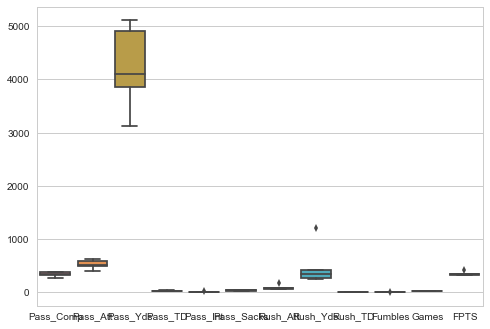

In [89]:
# Box Plot of Top 5 QBs in Fantasy Points
sns.set_style('whitegrid')
sns.boxplot(
    data = top_fantasy_qbs
)

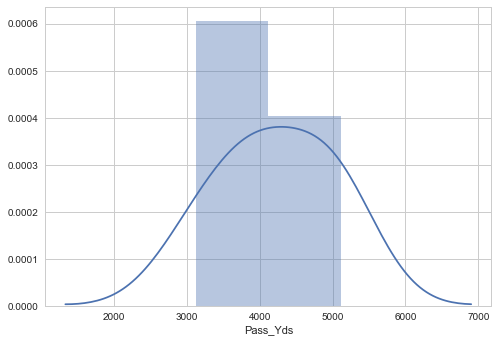

In [90]:
sns.distplot(top_fantasy_qbs.Pass_Yds)